In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

hide warnings in jupyter notebook

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_df = pd.read_csv('../data/wine_quality.csv')
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
FEAT_COLS = data_df.columns.tolist()[:-1]
FEAT_COLS

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

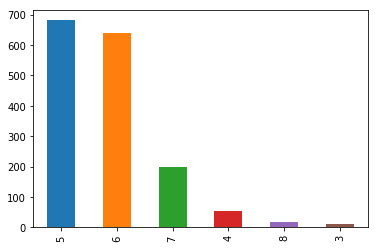

In [11]:
data_df.quality.value_counts().plot(kind='bar')
data_df.quality.value_counts()

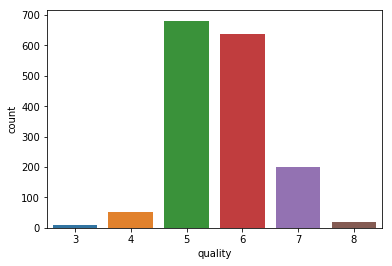

In [7]:
sns.countplot(data=data_df,x='quality')

In [14]:
data_df['level'] = data_df['quality'].apply(lambda x:0 if x <6 else 1)
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


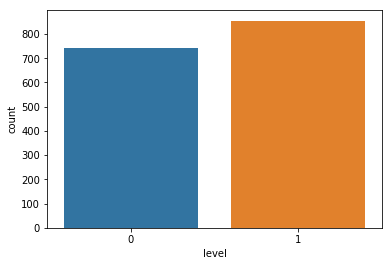

In [33]:
sns.countplot(data=data_df,x='level')

In [25]:
scaler = MinMaxScaler()
scaled_arr = scaler.fit_transform(data_df[FEAT_COLS])
scaled_df = pd.DataFrame(scaled_arr,columns=FEAT_COLS)
# data_df.drop(FEAT_COLS,axis=1)
scaled_df = pd.concat((scaled_df,data_df['level']),axis=1)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,level
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


In [27]:
X = scaled_df[FEAT_COLS].values
y = scaled_df['level']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=10)

In [36]:
model_dict = {
    'Neural Network': (MLPClassifier(),{'hidden_layer_sizes':[(100,),(100,100),(50,50,100)],
                                        'activation':['identity', 'logistic', 'tanh', 'relu']}),
    'Logistic Regression':(LogisticRegression(),{'C':[1e-2,1,1e2]}),
    'SVC':(SVC(),{'C':[1e-2,1,1e2]}),
    'KNN':(KNeighborsClassifier(),{'n_neighbors':[3,5,10],'p':[1,2]})
}

In [75]:
clf_list = []
for model_name, (model, params) in model_dict.items():
    clf = GridSearchCV(estimator=model,param_grid=params,cv=5)
    clf.fit(X_train,y_train)
    best_model = clf.best_estimator_
    acc = best_model.score(X_test,y_test)
    clf_list.append(clf)
    print('{} -> accuracy: {}'.format(model_name,acc))
    print(clf.best_params_)
    print()    

Neural Network -> accuracy: 0.7410881801125704
{'activation': 'relu', 'hidden_layer_sizes': (10, 100, 10)}

Logistic Regression -> accuracy: 0.7410881801125704
{'C': 1}

SVC -> accuracy: 0.7448405253283302
{'C': 100.0}

KNN -> accuracy: 0.7429643527204502
{'n_neighbors': 10, 'p': 1}



In [76]:
pd.DataFrame(clf_list[0].cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_activation,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.445382,0.001277,0.745779,0.753522,identity,"(100,)","{'activation': 'identity', 'hidden_layer_sizes...",4,0.719626,0.757042,...,0.737089,0.756155,0.807512,0.739742,0.764151,0.750585,0.014650,0.000214,0.037212,0.008117
1,0.482616,0.001344,0.746717,0.751178,identity,"(10, 100, 10)","{'activation': 'identity', 'hidden_layer_sizes...",3,0.710280,0.747653,...,0.741784,0.763189,0.812207,0.735053,0.750000,0.741218,0.108957,0.000041,0.035747,0.012851
2,0.457607,0.001073,0.739212,0.753758,identity,"(10, 10, 10)","{'activation': 'identity', 'hidden_layer_sizes...",9,0.742991,0.753521,...,0.704225,0.754982,0.788732,0.742087,0.740566,0.745902,0.059012,0.000253,0.028545,0.010424
3,1.254769,0.001447,0.738274,0.745082,logistic,"(100,)","{'activation': 'logistic', 'hidden_layer_sizes...",10,0.738318,0.751174,...,0.727700,0.756155,0.769953,0.719812,0.740566,0.737705,0.228081,0.000039,0.018251,0.014781
4,0.101597,0.001822,0.543152,0.543152,logistic,"(10, 100, 10)","{'activation': 'logistic', 'hidden_layer_sizes...",11,0.542056,0.543427,...,0.544601,0.542790,0.544601,0.542790,0.542453,0.543326,0.026042,0.000071,0.001191,0.000298
5,0.111926,0.001027,0.543152,0.543152,logistic,"(10, 10, 10)","{'activation': 'logistic', 'hidden_layer_sizes...",11,0.542056,0.543427,...,0.544601,0.542790,0.544601,0.542790,0.542453,0.543326,0.068212,0.000016,0.001191,0.000298
6,0.534479,0.001540,0.742026,0.753992,tanh,"(100,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",5,0.728972,0.762911,...,0.713615,0.756155,0.807512,0.725674,0.750000,0.756440,0.090000,0.000213,0.035600,0.014905
7,0.619640,0.001788,0.740150,0.743438,tanh,"(10, 100, 10)","{'activation': 'tanh', 'hidden_layer_sizes': (...",7,0.728972,0.730047,...,0.723005,0.751465,0.793427,0.720985,0.745283,0.740047,0.134305,0.000062,0.028902,0.018620
8,0.484145,0.001053,0.741088,0.749536,tanh,"(10, 10, 10)","{'activation': 'tanh', 'hidden_layer_sizes': (...",6,0.714953,0.758216,...,0.718310,0.737397,0.793427,0.732708,0.759434,0.752927,0.076251,0.000021,0.030782,0.012672
9,0.685249,0.001204,0.755159,0.761730,relu,"(100,)","{'activation': 'relu', 'hidden_layer_sizes': (...",2,0.747664,0.765258,...,0.737089,0.769050,0.816901,0.743259,0.764151,0.759953,0.066241,0.000025,0.035477,0.009987


In [77]:
pd.DataFrame(clf_list[1].cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.002391,0.000645,0.545028,0.545028,0.01,{'C': 0.01},3,0.542056,0.545775,0.542056,...,0.549296,0.543962,0.549296,0.543962,0.542453,0.545667,0.000385,0.000046,0.003485,0.000871
1,0.002683,0.000640,0.753283,0.752351,1,{'C': 1},1,0.724299,0.761737,0.714953,...,0.755869,0.751465,0.807512,0.729191,0.764151,0.751756,0.000187,0.000036,0.032803,0.013102
2,0.003292,0.000629,0.744841,0.757745,100,{'C': 100.0},2,0.728972,0.757042,0.710280,...,0.727700,0.766706,0.807512,0.746776,0.750000,0.747073,0.000138,0.000032,0.033751,0.009941


In [78]:
pd.DataFrame(clf_list[2].cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.035295,0.007118,0.543152,0.543152,0.01,{'C': 0.01},3,0.542056,0.543427,0.542056,...,0.544601,0.542790,0.544601,0.542790,0.542453,0.543326,0.001885,0.000290,0.001191,0.000298
1,0.030123,0.006216,0.729831,0.733822,1,{'C': 1},2,0.728972,0.744131,0.705607,...,0.699531,0.737397,0.769953,0.715123,0.745283,0.733021,0.000476,0.000226,0.025895,0.010009
2,0.032404,0.004765,0.746717,0.767593,100,{'C': 100.0},1,0.714953,0.769953,0.705607,...,0.732394,0.785463,0.821596,0.756155,0.759434,0.755269,0.002051,0.000108,0.041657,0.011136


In [79]:
pd.DataFrame(clf_list[3].cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_p,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001647,0.006646,0.709193,0.860458,3,1,"{'n_neighbors': 3, 'p': 1}",2,0.696262,0.856808,...,0.676056,0.862837,0.732394,0.849941,0.702830,0.867681,0.000179,0.000255,0.023214,0.006366
1,0.001527,0.005563,0.706379,0.846156,3,2,"{'n_neighbors': 3, 'p': 2}",3,0.696262,0.849765,...,0.680751,0.854631,0.732394,0.838218,0.688679,0.841920,0.000032,0.000304,0.022329,0.005759
2,0.001587,0.006951,0.704503,0.809101,5,1,"{'n_neighbors': 5, 'p': 1}",4,0.691589,0.813380,...,0.652582,0.814771,0.718310,0.806565,0.726415,0.804450,0.000041,0.000115,0.029601,0.004151
3,0.001678,0.005646,0.699812,0.818240,5,2,"{'n_neighbors': 5, 'p': 2}",6,0.719626,0.815728,...,0.690141,0.814771,0.723005,0.813599,0.683962,0.834895,0.000217,0.000154,0.017802,0.008410
4,0.001611,0.007761,0.712946,0.778847,10,1,"{'n_neighbors': 10, 'p': 1}",1,0.700935,0.785211,...,0.676056,0.796014,0.694836,0.777257,0.750000,0.769321,0.000096,0.000255,0.028648,0.010795
5,0.001724,0.006570,0.702627,0.778611,10,2,"{'n_neighbors': 10, 'p': 2}",5,0.663551,0.780516,...,0.694836,0.798359,0.699531,0.773740,0.726415,0.772834,0.000245,0.000492,0.023926,0.010694


```python
"""
    任务：红酒质量预测
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

DATA_FILE = './data/wine_quality.csv'


def main():
    """
        主函数
    """
    wine_data = pd.read_csv(DATA_FILE)
    # sns.countplot(data=wine_data, x='quality')
    # plt.show()

    # 数据预处理
    wine_data.loc[wine_data['quality'] <= 5, 'quality'] = 0
    wine_data.loc[wine_data['quality'] >= 1, 'quality'] = 1

    # sns.countplot(data=wine_data, x='quality')
    # plt.show()

    # 所有列名
    all_cols = wine_data.columns.tolist()

    # 特征列名称
    feat_cols = all_cols[:-1]

    # 特征
    X = wine_data[feat_cols].values
    # 标签
    y = wine_data['quality'].values

    # 数据集分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

    # 特征归一化
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 建立模型
    mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 100), activation='relu')
    mlp.fit(X_train_scaled, y_train)
    accuracy = mlp.score(X_test_scaled, y_test)
    print('神经网络模型的预测准确率：{:.2f}%'.format(accuracy * 100))


if __name__ == '__main__':
    main()
```